# Library Importing

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Loading Image from No Folder

In [2]:

image_path = 'C:/Users/pc/Downloads/MRI/no/1 no.jpeg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")



# Q1 : Image Conversion and Reconstruction from Image Spectrum to Frequency Spectrum and Back

### Utility Functions

In [3]:

# ! Custom Functions Implemented Manually from Scratch

# * Function to Center the Frequency of the Image
def center_image(image):
    M, N = image.shape
    x, y = np.indices((M, N))
    factor = (-1) ** (x + y)
    return image * factor

# * Function to Compute the 2D Discrete Fourier Transform using Loops
def dft_2D_loops(image):
    M, N = image.shape
    dft = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    dft[u, v] += image[x, y] * np.exp(-2j * np.pi * ((u * x) / M + (v * y) / N))
    return dft

# * Function to Compute the 2D Discrete Fourier Transform using Vectorization
def dft_2D_vectorized(image):
    M, N = image.shape
    x = np.arange(M).reshape(M, 1)
    y = np.arange(N).reshape(N, 1)
    u = np.arange(M).reshape(1, M)
    v = np.arange(N).reshape(1, N)
    W_m = np.exp(-2j * np.pi * (u * x) / M)
    W_n = np.exp(-2j * np.pi * (v * y) / N)
    return np.dot(W_m, np.dot(image, W_n))

# * Function to Compute the 2D Inverse Discrete Fourier Transform using Loops
def idft_2D_loops(dft_image):
    M, N = dft_image.shape
    original_img = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    original_img[u, v] += dft_image[x, y] * np.exp(2j * np.pi * ((u * x) / M + (v * y) / N))
            original_img[u, v] /= (M * N)
    return original_img

# * Function to Compute the 2D Inverse Discrete Fourier Transform using Vectorization
def idft_2D_vectorized(F):
    M, N = F.shape
    x = np.arange(M).reshape(M, 1)
    y = np.arange(N).reshape(N, 1)
    u = np.arange(M).reshape(1, M)
    v = np.arange(N).reshape(1, N)
    W_M_inv = np.exp(2j * np.pi * (x @ u) / M)  
    W_N_inv = np.exp(2j * np.pi * (y @ v) / N)  
    image = np.dot(W_M_inv, np.dot(F, W_N_inv)) / (M * N)
    return np.real(image)  

# * Function to compute the Mean Squared Error between the Original and Reconstructed Images
def mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)


### Implementation of Q1

Mean Squared Error (MSE): 1.9697173525124462e-23


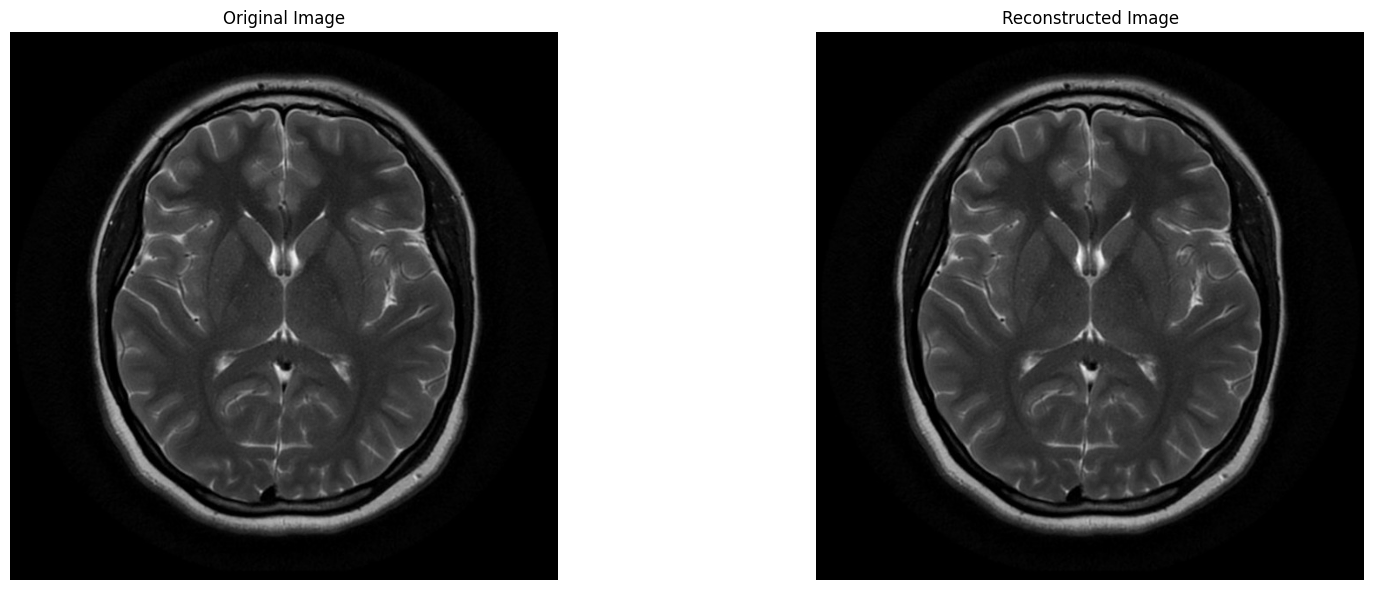

In [4]:

# * Convert image to float64 for numerical precision
image = image.astype(np.float64)

# * Center the image
centered_image = center_image(image)

# * Compute the 2D Discrete Fourier Transform
dft_img = dft_2D_vectorized(centered_image)

# * Compute the 2D Inverse Discrete Fourier Transform and Convert the transform back into original image
image_reconstructed = idft_2D_vectorized(dft_img)
image_reconstructed = center_image(image_reconstructed)

# * Compute the Mean Squared Error (MSE) between the original and reconstructed images
error = mse(image, image_reconstructed)
print("Mean Squared Error (MSE):", error)

# * Display the original image, DFT magnitude spectrum, and the reconstructed image
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Q2 : Computing and Comparing Magnitude and Power Spectrum of the Image

### Implementation of Conversion to Frequency Spectrum, Computing Magnitude and Power Spectrum and Reconstruction of Original Image

Mean Squared Error (MSE): 1.9697173525124462e-23


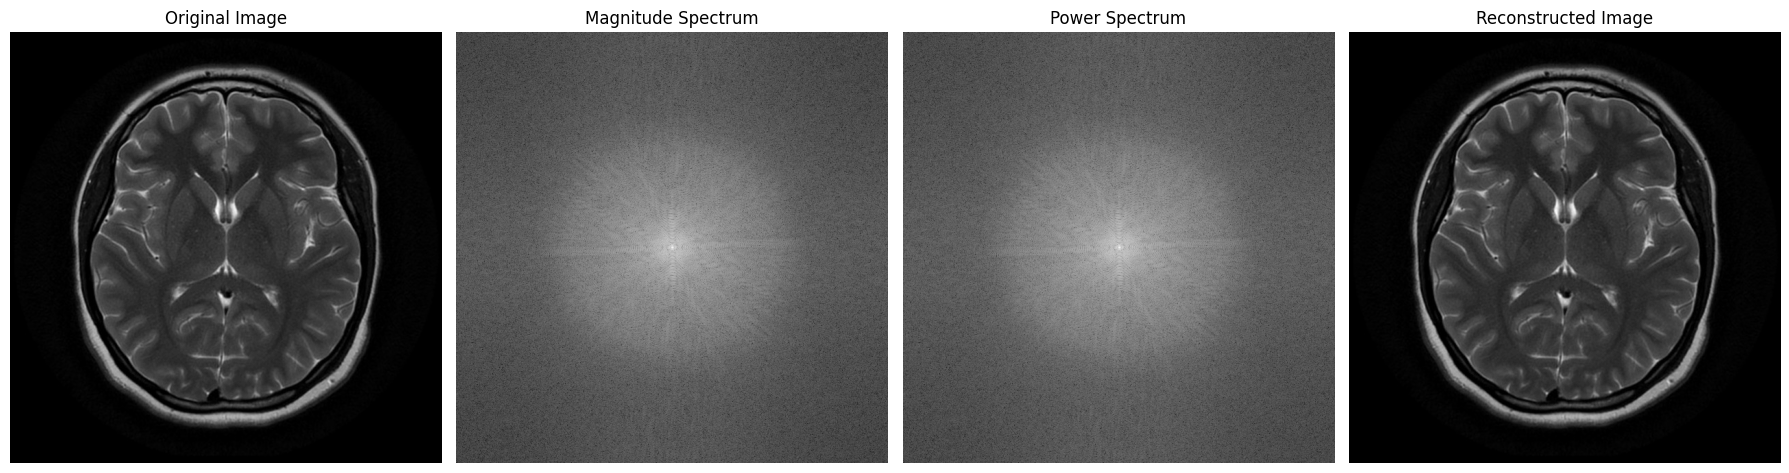

In [9]:

# * Convert image to float64 for numerical precision
image = image.astype(np.float64)

# * Center the image
centered_image = center_image(image)

# * Compute the 2D Discrete Fourier Transform
dft_img = dft_2D_vectorized(centered_image)

# * Compute Magnitude and Power Spectrums
magnitude_spectrum = np.log( 1 + np.abs(dft_img))
power_spectrum = np.abs(dft_img) ** 2

# * Compute the 2D Inverse Discrete Fourier Transform and Convert the transform back into original image
image_reconstructed = idft_2D_vectorized(dft_img)
image_reconstructed = center_image(image_reconstructed)

# * Compute the Mean Squared Error (MSE) between the original and reconstructed images
error = mse(image, image_reconstructed)
print("Mean Squared Error (MSE):", error)

# * Display the original image, DFT magnitude spectrum, and the reconstructed image
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(np.log( 1 + power_spectrum), cmap='gray')
plt.title("Power Spectrum")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

plt.tight_layout()
plt.show()

The power spectrum is generally more effective for distinguishing important details from noise due to the following reasons:

Important Details Amplification:  
  Significant image features (like edges, textures, and fine structures) usually have high energy in specific frequency bands. When you square the magnitude to get the power spectrum, these high-energy components become even more pronounced.

Noise Suppression:  
  Noise tends to be spread more evenly across frequencies or appears as lower-energy components. In the power spectrum, these lower-energy values are less dominant, making it easier to differentiate them from the high-energy details.

Thus, while the magnitude spectrum shows the strength of frequency components, the power spectrum, by emphasizing energy differences, provides a clearer view of which frequencies are contributing important details versus those that may be attributed to noise.

# Q3 : Image Smoothing/Blurring

### Utility Functions

In [6]:

# ! Functions for Low Pass Filtering

# * Ideal Low Pass Filter
def ideal_lpf(shape, D0):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = (D <= D0).astype(float)
    return H

# * Butterworth Low Pass Filter
def butterworth_lpf(shape, D0, beta=1, n=2):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + beta * (D / D0)**(2*n) )
    return H

# * Gaussian Low Pass Filter
def gaussian_lpf(shape, D0):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    return H


### Implementation of Ideal, Butterworth and Gaussian Low-Pass Filtering 

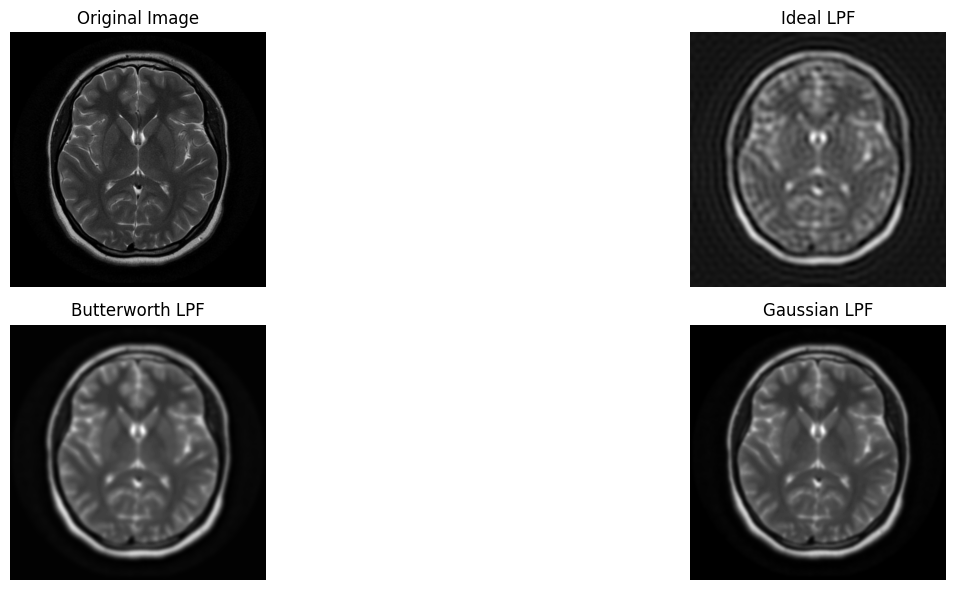

In [7]:

# * Hyperparameters for the filters
D0 = 30  
butter_order = 2

# * Convert the image to float64 for precision
image = image.astype(np.float64)

# * Center the image
centered_image = center_image(image)

# * Compute the 2D DFT of the image using our custom function
dft_img = dft_2D_vectorized(centered_image)

# * Generate filter masks.
H_ideal    = ideal_lpf(image.shape, D0)
H_butter   = butterworth_lpf(image.shape, D0, beta=1, n=butter_order)
H_gaussian = gaussian_lpf(image.shape, D0)

# * Apply the filters in the frequency domain
F_ideal    = dft_img * H_ideal
F_butter   = dft_img * H_butter
F_gaussian = dft_img * H_gaussian

# * Reconstruct the filtered images using the IDFT
image_ideal    = idft_2D_vectorized(F_ideal)
image_butter   = idft_2D_vectorized(F_butter)
image_gaussian = idft_2D_vectorized(F_gaussian)

# * Center the images for visualization
image_ideal    = center_image(image_ideal)
image_butter   = center_image(image_butter)
image_gaussian = center_image(image_gaussian)

# * Display the original image and the filtered images
plt.figure(figsize=(18, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(image_ideal, cmap='gray')
plt.title("Ideal LPF")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(image_butter, cmap='gray')
plt.title("Butterworth LPF")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(image_gaussian, cmap='gray')
plt.title("Gaussian LPF")
plt.axis("off")

plt.tight_layout()
plt.show()

ILPF has ringing effect due to low cut-off frequency.

Butterworth LPF performs better when less ringing effect and good blurring to computational efficiency ratio.

Gaussian LPF performs the best blurring effect with no ringing effect but if the most computationally expensive due to use of exponential.


# Q4 : Image Sharpening

### Loading Image from Yes Folder

In [8]:

image_path = 'C:/Users/pc/Downloads/MRI/yes/Y1.jpg'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")


### Implementation of Image Sharpening via High-Frequency Emphasis Filter

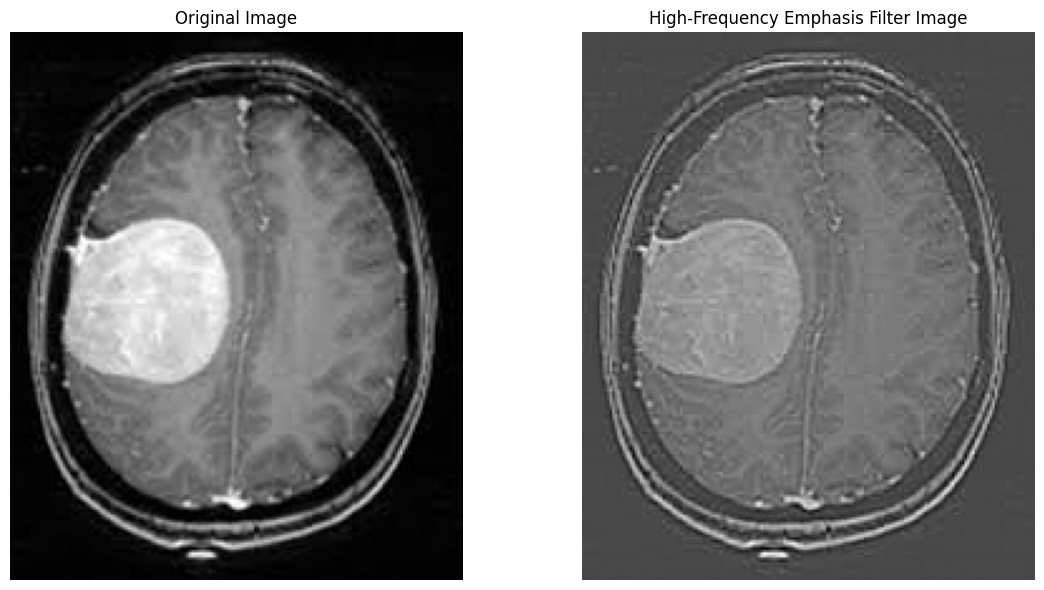

In [9]:

# * Hyperparameters for the filters
D0 = 30  
A = 0.5
B = 1.5

# * Convert the image to float64 for precision
image = image.astype(np.float64)

# * Center the image
centered_image = center_image(image)

# * Compute the 2D DFT of the image using our custom function.
dft_img = dft_2D_vectorized(centered_image)

# * Generate filter masks
H_gaussian = gaussian_lpf(image.shape, D0)

# * Apply the sharpening filters in the frequency domain
H_hp = 1 - H_gaussian
H_hfe = A + B * H_hp
hfe_image = dft_img * H_hfe

# * Reconstruct the filtered images using the IDFT.
image_hfe = idft_2D_vectorized(hfe_image)

# * Center the images for visualization.
image_hfe = center_image(image_hfe)

# * Display the original image and the filtered images.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_hfe, cmap='gray')
plt.title("High-Frequency Emphasis Filter Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### Displaying the Sharpened Image with varying values of A and B

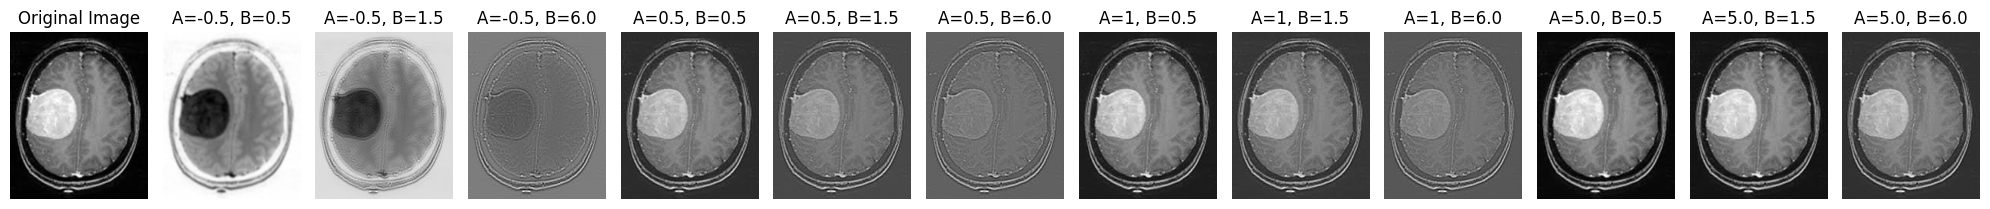

In [ ]:

# * Hyperparameters for the filters
D0 = 30  
A_values = [-0.5, 0.5, 1, 5.0]  # Different values for A
B_values = [0.5, 1.5, 6.0]  # Different values for B

# * Convert the image to float64 for precision
image = image.astype(np.float64)

# * Center the image
centered_image = center_image(image)

# * Compute the 2D DFT of the image using our custom function.
dft_img = dft_2D_vectorized(centered_image)

# * Generate filter masks
H_gaussian = gaussian_lpf(image.shape, D0)
H_hp = 1 - H_gaussian

# * Display the original image
plt.figure(figsize=(20, 10))
plt.subplot(1, len(A_values) * len(B_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# * Iterate over different values of A and B
plot_idx = 2
for A in A_values:
    for B in B_values:
        H_hfe = A + B * H_hp
        hfe_image = dft_img * H_hfe
        image_hfe = idft_2D_vectorized(hfe_image)
        image_hfe = center_image(image_hfe)
        
        plt.subplot(1, len(A_values) * len(B_values) + 1, plot_idx)
        plt.imshow(image_hfe, cmap='gray')
        plt.title(f"A={A}, B={B}")
        plt.axis("off")
        plot_idx += 1

plt.tight_layout()
plt.show()


High-Frequency Emphasis Filter highlights the edges of the original image, making it sharper.

# Q6 : Computing MSE, PSNR and Power Spectrum of Multiple Reconstructed Images and their corresponding Original Images

### Loading images from both Yes and No Folders

In [10]:

no_image_path = 'C:/Users/pc/Downloads/MRI/no/1 no.jpeg'
no_image = cv2.imread(no_image_path, cv2.IMREAD_GRAYSCALE)
if no_image is None:
    raise FileNotFoundError(f"Image not found at path: {no_image_path}")


yes_image_path = 'C:/Users/pc/Downloads/MRI/yes/Y1.jpg'
yes_image = cv2.imread(yes_image_path, cv2.IMREAD_GRAYSCALE)
if yes_image is None:
    raise FileNotFoundError(f"Image not found at path: {yes_image_path}")



## Mean Squared Error Evaluation

In [ ]:

# * Computing MSE of the Original and Ideal LPF Image
error = mse(no_image, image_ideal)
print(f"MSE between Original and Ideal LPF image : {error:.2f}")

# * Computing MSE of the Original and Butterworth LPF Image
error = mse(no_image, image_butter)
print(f"MSE between Original and Butter LPF image : {error:.2f}")

# * Computing MSE of the Original and Gaussian LPF Image
error = mse(no_image, image_gaussian)
print(f"MSE between Original and Gaussian LPF image : {error:.2f}")

# * Computing MSE of the Original and High-Frequency Emphasis Filtered Image
error = mse(yes_image, image_hfe)
print(f"MSE between Original and High-Frequency Emphasis Filter image : {error:.2f}")


MSE between Original and Ideal LPF image : 150.59
MSE between Original and Butter LPF image : 116.14
MSE between Original and Gaussian LPF image : 94.89
MSE between Original and High-Frequency Emphasis Filter image : 2558.16


## Peak Signal-to-Noise Ratio Evaluation

In [ ]:

# * Function to Compute the Peak Signal-to-Noise Ratio (PSNR)
def psnr(max_pixel_value, mse_value):
    return 10 * np.log10(max_pixel_value**2 / mse_value)

# * Maximum Pixel Value in the Image
max_pixel_value = 255

# * Computing PSNR of the Original and Ideal LPF Image
psnr_ideal = psnr(max_pixel_value, mse(no_image, image_ideal))

# * Computing PSNR of the Original and Butterworth LPF Image
psnr_butter = psnr(max_pixel_value, mse(no_image, image_butter))

# * Computing PSNR of the Original and Gaussian LPF Image
psnr_gaussian = psnr(max_pixel_value, mse(no_image, image_gaussian))

# * Computing PSNR of the Original and High-Frequency Emphasis Filtered Image
psnr_hfe = psnr(max_pixel_value, mse(yes_image, image_hfe))


# * Display the PSNR values
print(f"Peak Signal-to-Noise Ratio (PSNR) between Original and Ideal LPF image : {psnr_ideal:.2f} dB")
print(f"Peak Signal-to-Noise Ratio (PSNR) between Original and Butter LPF image : {psnr_butter:.2f} dB")
print(f"Peak Signal-to-Noise Ratio (PSNR) between Original and Gaussian LPF image : {psnr_gaussian:.2f} dB")
print(f"Peak Signal-to-Noise Ratio (PSNR) between Original and High-Frequency Emphasis Filter image : {psnr_hfe:.2f} dB")

Peak Signal-to-Noise Ratio (PSNR) between Original and Ideal LPF image : 26.35 dB
Peak Signal-to-Noise Ratio (PSNR) between Original and Butter LPF image : 27.48 dB
Peak Signal-to-Noise Ratio (PSNR) between Original and Gaussian LPF image : 28.36 dB
Peak Signal-to-Noise Ratio (PSNR) between Original and High-Frequency Emphasis Filter image : 14.05 dB


## Power Spectrum Evaluation

In [ ]:

# * Function to Compute the Power Spectrum of a 2D Image
def power_spectrum_2D(image):
    dft_image = dft_2D_vectorized(center_image(image))
    power_spec = np.abs(dft_image) ** 2
    return np.sum(power_spec)


# * Compute the Power Spectrum of the Original No Image
no_original_power_spec = power_spectrum_2D(no_image)

# * Compute the Power Spectrum of the Original Yes Image
yes_original_power_spec = power_spectrum_2D(yes_image)

# * Compute the Power Spectrum of the Ideal LPF Image
ideal_power_spec = power_spectrum_2D(image_ideal)

# * Compute the Power Spectrum of the Butterworth LPF Image
butter_power_spec = power_spectrum_2D(image_butter)

# * Compute the Power Spectrum of the Gaussian LPF Image
gaussian_power_spec = power_spectrum_2D(image_gaussian)

# * Compute the Power Spectrum of the High-Frequency Emphasis Filtered Image
hfe_power_spec = power_spectrum_2D(image_hfe)

# * Display the Power Spectrum values
print(f"Power Spectrum of Original No Tumor Image: {no_original_power_spec:.2e}")
print(f"Power Spectrum of Ideal LPF Image: {ideal_power_spec:.2e}")
print(f"Power Spectrum of Butterworth LPF Image: {butter_power_spec:.2e}")
print(f"Power Spectrum of Gaussian LPF Image: {gaussian_power_spec:.2e}")
print(f"Power Spectrum of Original Yes Tumor Image: {yes_original_power_spec:.2e}")
print(f"Power Spectrum of High-Frequency Emphasis Filter Image: {hfe_power_spec:.2e}")



Power Spectrum of Original No Tumor Image: 3.47e+14
Power Spectrum of Ideal LPF Image: 3.23e+14
Power Spectrum of Butterworth LPF Image: 3.11e+14
Power Spectrum of Gaussian LPF Image: 3.09e+14
Power Spectrum of Original Yes Tumor Image: 1.63e+13
Power Spectrum of High-Frequency Emphasis Filter Image: 4.89e+12


## Display Results Visually

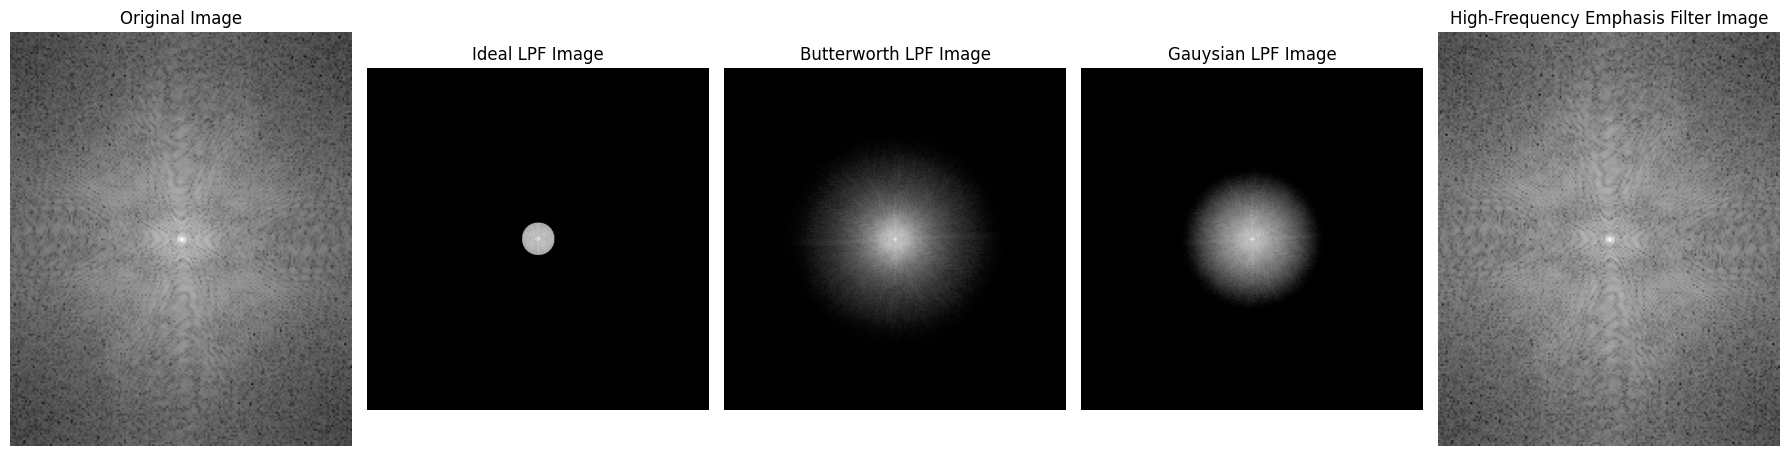

In [ ]:

# * Display the Original Image, Ideal LPF Image, Butterworth LPF Image, Gaussian LPF Image, and High-Frequency Emphasis Filter Image
plt.figure(figsize=(18, 12))

plt.subplot(1, 5, 1)
power_spec = np.abs( dft_2D_vectorized(center_image(image)) ) ** 2
plt.imshow(np.log(1 + power_spec), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 5, 2)
power_spec = np.abs( dft_2D_vectorized(center_image(image_ideal)) ) ** 2
plt.imshow(np.log(1 + power_spec), cmap='gray')
plt.title("Ideal LPF Image")
plt.axis("off")

plt.subplot(1, 5, 3)
power_spec = np.abs( dft_2D_vectorized(center_image(image_butter)) ) ** 2
plt.imshow(np.log(1 + power_spec), cmap='gray')
plt.title("Butterworth LPF Image")
plt.axis("off")

plt.subplot(1, 5, 4)
power_spec = np.abs( dft_2D_vectorized(center_image(image_gaussian)) ) ** 2
plt.imshow(np.log(1 + power_spec), cmap='gray')
plt.title("Gauysian LPF Image")
plt.axis("off")

plt.subplot(1, 5, 5)
power_spec = np.abs( dft_2D_vectorized(center_image(image_hfe)) ) ** 2
plt.imshow(np.log(1 + power_spec), cmap='gray')
plt.title("High-Frequency Emphasis Filter Image")
plt.axis("off")

plt.tight_layout()
plt.show()

## Quantitative Analysis

The Gaussian LPF yields the best performance, with the lowest MSE (94.89) and highest PSNR (28.36 dB), and its power spectrum (3.09e+14) is closest to that of the original no-tumor image (3.47e+14). In contrast, the Ideal and Butterworth LPFs show higher errors, while the High-Frequency Emphasis filter drastically deviates from the original. Thus, the Gaussian LPF best preserves image quality for the given hyperparamters.

# Q7 : Create a Synthetic Image with a White Sqaure and Experiment with Different Cutt-Off Frequencies and Custom Smoothing Filtering Functions

### Utility Functions

In [ ]:

# * Generate a synthetic image
def create_synthetic_image(size=256, square_size=64):
    image = np.zeros((size, size), dtype=np.float64)
    start = size // 2 - square_size // 2
    end = start + square_size
    image[start:end, start:end] = 255
    return image

# ! Custom Smoothing Filter Functions

# * Custom Smoothing Filter 1
def custom_smooth_filter1(shape, D0, alpha=2):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = np.exp(- (D / D0)**alpha)
    return H

# * Custom Smoothing Filter 2
def custom_smooth_filter2(shape, D0, alpha=2):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = np.exp(- (D**2) / (2 * (D0**2))) * 1 / alpha
    return H

# * Custom Smoothing Filter 3
def custom_smooth_filter3(shape, D0, alpha=2):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = np.exp(- (D**alpha) / (alpha * (D0**2)))
    return H

# * Custom Smoothing Filter 4
def custom_smooth_filter4(shape, D0, alpha=2):
    M, N = shape
    u = np.arange(-M//2, M - M//2).reshape(M, 1)
    v = np.arange(-N//2, N - N//2).reshape(1, N)
    D = np.sqrt(u**2 + v**2)
    H = np.exp(- (D**2) / (2 * (D0**2))) * ( D0 / alpha )
    return H


### Implementation of Experimenting with Varying Cut-Off Frequencies on Ideal LPF and Analyzing the Results

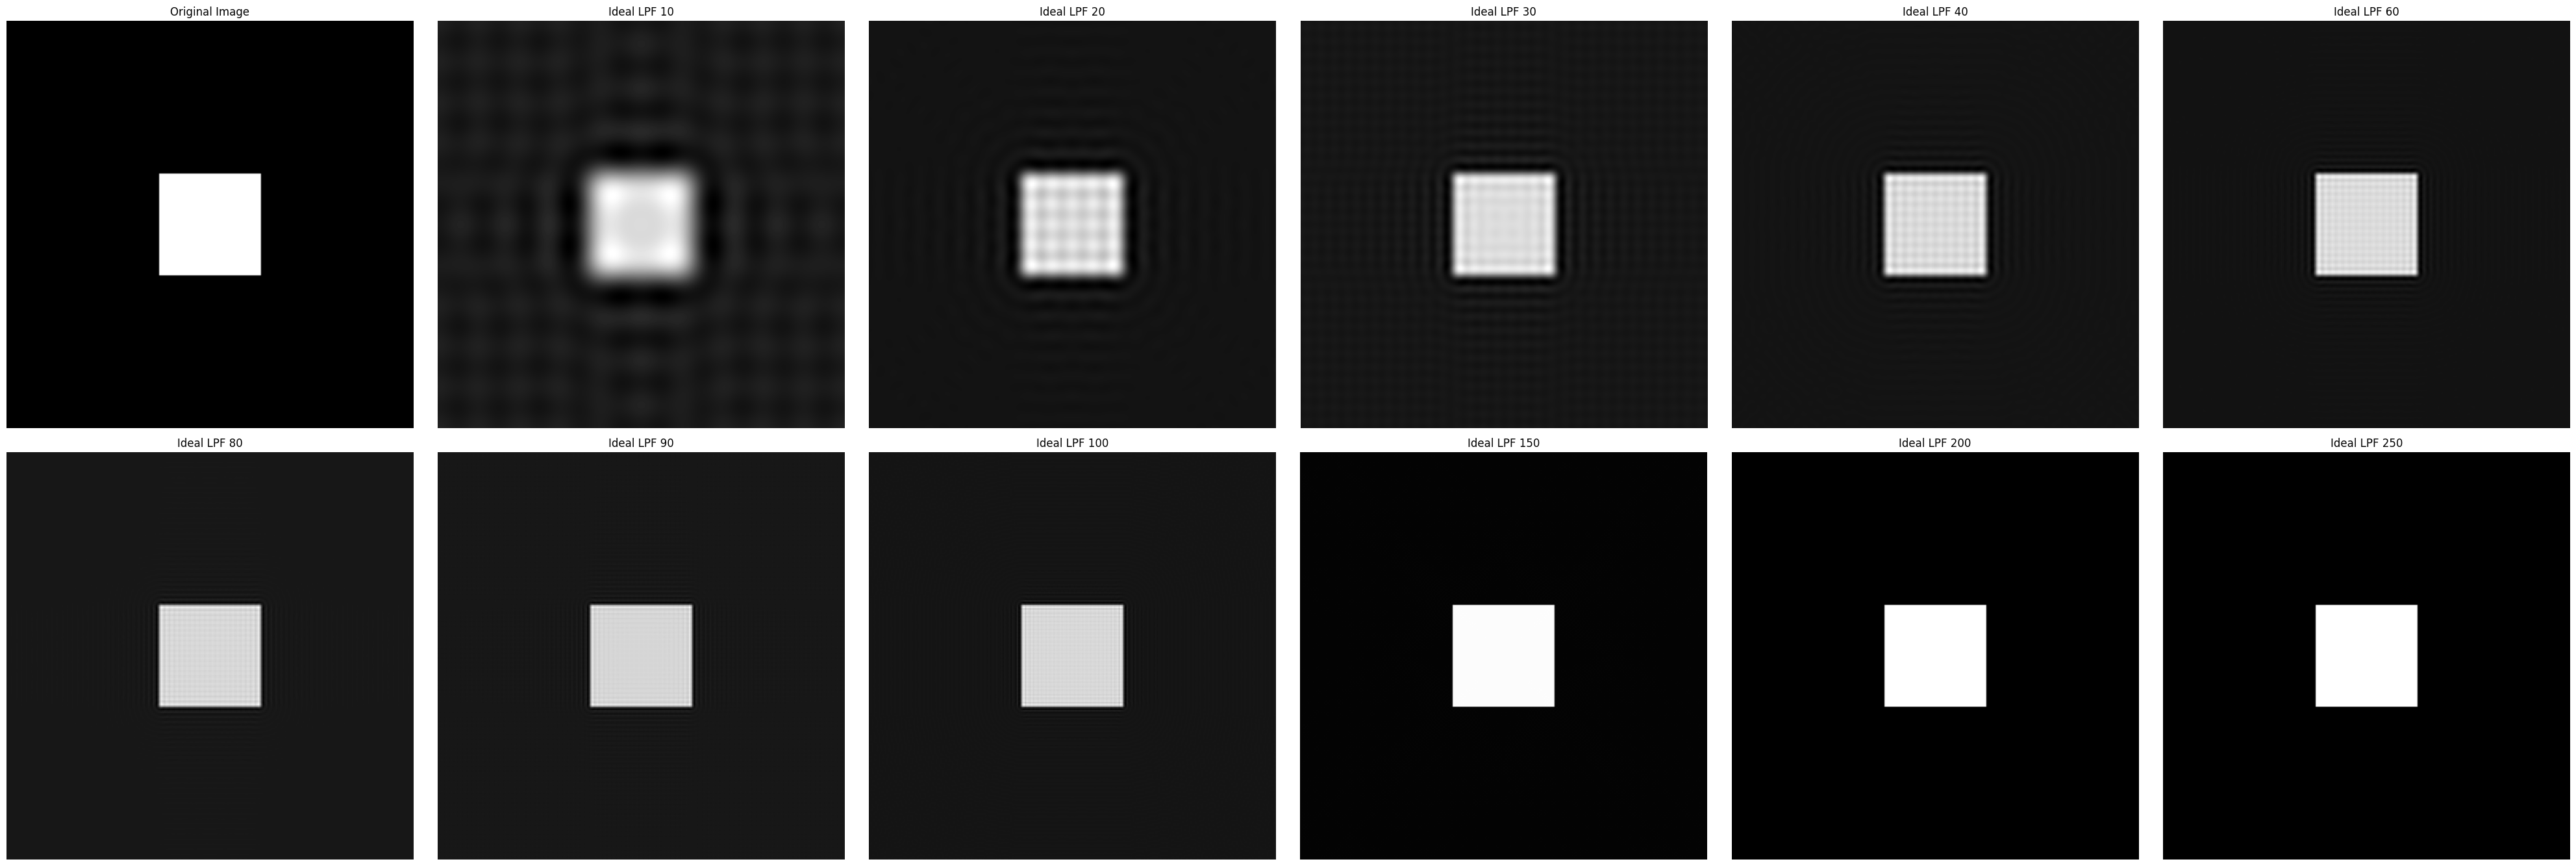

In [16]:

# * Generate a synthetic image
synthetic_image = create_synthetic_image(size=256, square_size=64)

# * Center the image
centered_image = center_image(synthetic_image)

# * Compute the 2D DFT of the synthetic_image using our custom function
dft_img = dft_2D_vectorized(centered_image)

# * Define a cutoff frequencies
D0 = [10, 20, 30, 40, 60, 80, 90, 100, 150, 200, 250]

# * Generate filter masks.
H_ideal_0    = ideal_lpf(synthetic_image.shape, D0[0])
H_ideal_1    = ideal_lpf(synthetic_image.shape, D0[1])
H_ideal_2    = ideal_lpf(synthetic_image.shape, D0[2])
H_ideal_3    = ideal_lpf(synthetic_image.shape, D0[3])
H_ideal_4    = ideal_lpf(synthetic_image.shape, D0[4])
H_ideal_5    = ideal_lpf(synthetic_image.shape, D0[5])
H_ideal_6    = ideal_lpf(synthetic_image.shape, D0[6])
H_ideal_7    = ideal_lpf(synthetic_image.shape, D0[7])
H_ideal_8    = ideal_lpf(synthetic_image.shape, D0[8])
H_ideal_9    = ideal_lpf(synthetic_image.shape, D0[9])
H_ideal_10    = ideal_lpf(synthetic_image.shape, D0[10])


# * Apply the filters in the frequency domain
F_ideal_0    = dft_img * H_ideal_0
F_ideal_1    = dft_img * H_ideal_1
F_ideal_2    = dft_img * H_ideal_2
F_ideal_3    = dft_img * H_ideal_3
F_ideal_4    = dft_img * H_ideal_4
F_ideal_5    = dft_img * H_ideal_5
F_ideal_6    = dft_img * H_ideal_6
F_ideal_7    = dft_img * H_ideal_7
F_ideal_8    = dft_img * H_ideal_8
F_ideal_9    = dft_img * H_ideal_9
F_ideal_10    = dft_img * H_ideal_10


# * Reconstruct the filtered images using the IDFT
image_ideal_0    = idft_2D_vectorized(F_ideal_0)
image_ideal_1    = idft_2D_vectorized(F_ideal_1)
image_ideal_2    = idft_2D_vectorized(F_ideal_2)
image_ideal_3    = idft_2D_vectorized(F_ideal_3)
image_ideal_4    = idft_2D_vectorized(F_ideal_4)
image_ideal_5    = idft_2D_vectorized(F_ideal_5)
image_ideal_6    = idft_2D_vectorized(F_ideal_6)
image_ideal_7    = idft_2D_vectorized(F_ideal_7)
image_ideal_8    = idft_2D_vectorized(F_ideal_8)
image_ideal_9    = idft_2D_vectorized(F_ideal_9)
image_ideal_10    = idft_2D_vectorized(F_ideal_10)

# * Center the images for visualization
image_ideal_0    = center_image(image_ideal_0)
image_ideal_1    = center_image(image_ideal_1)
image_ideal_2    = center_image(image_ideal_2)
image_ideal_3    = center_image(image_ideal_3)
image_ideal_4    = center_image(image_ideal_4)
image_ideal_5    = center_image(image_ideal_5)
image_ideal_6    = center_image(image_ideal_6)
image_ideal_7    = center_image(image_ideal_7)
image_ideal_8    = center_image(image_ideal_8)
image_ideal_9    = center_image(image_ideal_9)
image_ideal_10    = center_image(image_ideal_10)

# * Display the original synthetic_image and the filtered images
plt.figure(figsize=(40, 40))

plt.subplot(6, 6, 1)
plt.imshow(synthetic_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(6, 6, 2)
plt.imshow(image_ideal_0, cmap='gray')
plt.title(f"Ideal LPF {D0[0]}")
plt.axis("off")

plt.subplot(6, 6, 3)
plt.imshow(image_ideal_1, cmap='gray')
plt.title(f"Ideal LPF {D0[1]}")
plt.axis("off")

plt.subplot(6, 6, 4)
plt.imshow(image_ideal_2, cmap='gray')
plt.title(f"Ideal LPF {D0[2]}")
plt.axis("off")

plt.subplot(6, 6, 5)
plt.imshow(image_ideal_3, cmap='gray')
plt.title(f"Ideal LPF {D0[3]}")
plt.axis("off")

plt.subplot(6, 6, 6)
plt.imshow(image_ideal_4, cmap='gray')
plt.title(f"Ideal LPF {D0[4]}")
plt.axis("off")

plt.subplot(6, 6, 7)
plt.imshow(image_ideal_5, cmap='gray')
plt.title(f"Ideal LPF {D0[5]}")
plt.axis("off")

plt.subplot(6, 6, 8)
plt.imshow(image_ideal_6, cmap='gray')
plt.title(f"Ideal LPF {D0[6]}")
plt.axis("off")

plt.subplot(6, 6, 9)
plt.imshow(image_ideal_7, cmap='gray')
plt.title(f"Ideal LPF {D0[7]}")
plt.axis("off")

plt.subplot(6, 6, 10)
plt.imshow(image_ideal_8, cmap='gray')
plt.title(f"Ideal LPF {D0[8]}")
plt.axis("off")

plt.subplot(6, 6, 11)
plt.imshow(image_ideal_9, cmap='gray')
plt.title(f"Ideal LPF {D0[9]}")
plt.axis("off")

plt.subplot(6, 6, 12)
plt.imshow(image_ideal_10, cmap='gray')
plt.title(f"Ideal LPF {D0[10]}")
plt.axis("off")


plt.tight_layout()
plt.show()



Lower cut-off frequency led to more ripple effect

Higher cut-off frequency led to less ripple effect

### Experimenting with Different Custom Smoothing Filters and Analyzing the Results

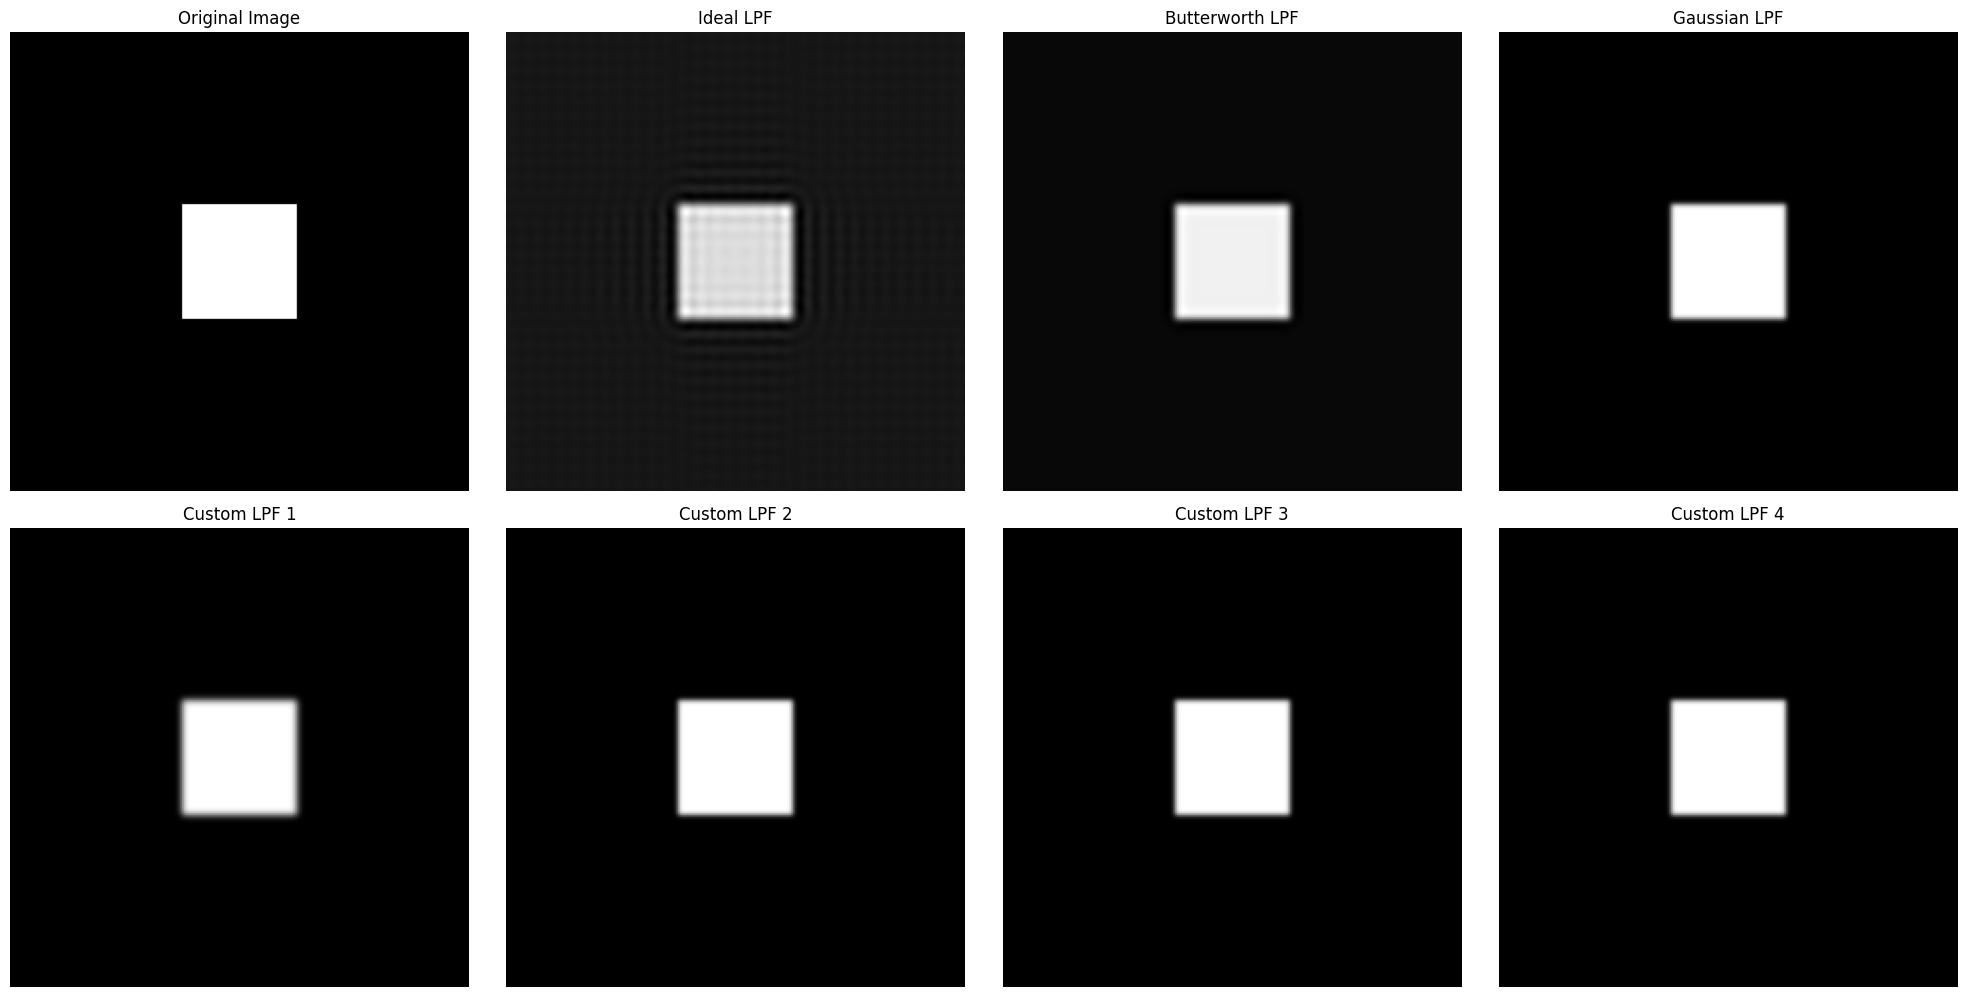

In [17]:

# * Generate a synthetic image
synthetic_image = create_synthetic_image(size=256, square_size=64)

# * Center the image
centered_image = center_image(synthetic_image)

# * Compute the 2D DFT of the synthetic_image using our custom function.
dft_img = dft_2D_vectorized(centered_image)

# * Define a cutoff frequency and Butterworth order.
D0 = 30 
butter_order = 2
alpha = 2
beta = 1

# * Generate filter masks.
H_ideal    = ideal_lpf(synthetic_image.shape, D0)
H_butter   = butterworth_lpf(synthetic_image.shape, D0, beta=beta, n=butter_order)
H_gaussian = gaussian_lpf(synthetic_image.shape, D0)
H_custom1  = custom_smooth_filter1(synthetic_image.shape, D0, alpha=alpha)
H_custom2  = custom_smooth_filter2(synthetic_image.shape, D0, alpha=alpha)
H_custom3  = custom_smooth_filter3(synthetic_image.shape, D0, alpha=alpha)
H_custom4  = custom_smooth_filter4(synthetic_image.shape, D0, alpha=alpha)

# * Apply the filters in the frequency domain.
F_ideal    = dft_img * H_ideal
F_butter   = dft_img * H_butter
F_gaussian = dft_img * H_gaussian
F_custom1  = dft_img * H_custom1
F_custom2  = dft_img * H_custom2
F_custom3  = dft_img * H_custom3
F_custom4  = dft_img * H_custom4

# * Reconstruct the filtered images using the IDFT.
image_ideal    = idft_2D_vectorized(F_ideal)
image_butter   = idft_2D_vectorized(F_butter)
image_gaussian = idft_2D_vectorized(F_gaussian)
image_custom1  = idft_2D_vectorized(F_custom1)
image_custom2  = idft_2D_vectorized(F_custom2)
image_custom3  = idft_2D_vectorized(F_custom3)
image_custom4  = idft_2D_vectorized(F_custom4)

# * Center the images for visualization.
image_ideal    = center_image(image_ideal)
image_butter   = center_image(image_butter)
image_gaussian = center_image(image_gaussian)
image_custom1  = center_image(image_custom1)
image_custom2  = center_image(image_custom2)
image_custom3  = center_image(image_custom3)
image_custom4  = center_image(image_custom4)

# * Display the original synthetic_image and the filtered images.
plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.imshow(synthetic_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(4, 4, 2)
plt.imshow(image_ideal, cmap='gray')
plt.title("Ideal LPF")
plt.axis("off")

plt.subplot(4, 4, 3)
plt.imshow(image_butter, cmap='gray')
plt.title("Butterworth LPF")
plt.axis("off")

plt.subplot(4, 4, 4)
plt.imshow(image_gaussian, cmap='gray')
plt.title("Gaussian LPF")
plt.axis("off")

plt.subplot(4, 4, 5)
plt.imshow(image_custom1, cmap='gray')
plt.title("Custom LPF 1")
plt.axis("off")

plt.subplot(4, 4, 6)
plt.imshow(image_custom2, cmap='gray')
plt.title("Custom LPF 2")
plt.axis("off")

plt.subplot(4, 4, 7)
plt.imshow(image_custom3, cmap='gray')
plt.title("Custom LPF 3")
plt.axis("off")

plt.subplot(4, 4, 8)
plt.imshow(image_custom4, cmap='gray')
plt.title("Custom LPF 4")
plt.axis("off")

plt.tight_layout()
plt.show()



Custom LPF 2 persered edges the best

Custom LPF 1 performed the best blurr

Custom LPF 3 and 4 performed similar to each other

### Happy Coding :)